In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.animation as animation

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_colwidth',-1)

%matplotlib notebook

# Ukrainian building industry in 2017 

## Exploring the data

Datasets below describes a total area of houses completed and accepted for expulsion in Ukraine within administrative regions in 2017.

Initial source: http://www.ukrstat.gov.ua/

Links to English versions of datasets:

* Buildings in rural areas
* Buildings in urban areas
* Numbers of floors in buildings

**Questions to the dataset:**
* Which regions has the biggest encrease in urban areas?
* Which regions has the biggest encrease in rural areas?
* Is there dependency between fraction of urban total built housing area and average number of floors in building?

In [64]:
df = pd.read_excel('total_bud.xlsx',header = 2).drop('Ukraine', axis = 0).rename(columns = {
    'Unnamed: 3':'buildings_quantity', 'Total area':'total', '% to previous year':'to_previous', 
    'To 1000 people of population': 'to_population'})
df_rural = pd.read_excel('buildings_rural.xlsx',header = 3).rename(columns = {
    'Unnamed: 3':'buildings_quantity', 'Total area':'total_rural', '% to previous year':'to_previous', 
    'To 1000 people of population': 'to_population'
}).drop('Ukraine', axis = 0)
df_urban = pd.read_excel('buildings_urban.xlsx',header = 3).rename(columns = {
    'Unnamed: 3':'buildings_quantity', 'Total area':'total_urban', '% to previous year':'to_previous', 
    'To 1000 people of population': 'to_population'
}).drop('Ukraine', axis = 0)
df_floors = pd.read_excel('floors.xlsx',encoding = 'utf8', header = 5, usecols = 'A:H').\
drop('Total', axis = 1).fillna(0, axis = 0, inplace = False)

In [65]:
df['urban'] = df_urban.total_urban
df['rural'] = df_rural.total_rural
df = df.reset_index()
df_floors = df_floors.reset_index()
df = df.merge(df_floors, how = 'left', on = 'index')

In [66]:
df = df.sort_values(by= 'total', ascending = True)
df.total = df.total/1000
df.urban = df.urban/1000
df.rural = df.rural/1000
df = df.set_index('index')
df_floors = df_floors.set_index('index')

In [12]:
df.head(3)

,total,to_previous,to_population,buildings_quantity,urban,rural,1- 2 floors,3-5 floors,6-8 floors,9-12 floors,13-15 floors,> 16 floors
index,,,,,,,,,,,,
Luganska,21.193,299.4,9.735184,99,16.870,4.323,13487.0,1091.0,0.0,0.0,0.0,0.0
Kirovogradska,51.075,95.3,53.504758,224,41.080,9.995,29143.0,1503.0,0.0,5278.0,4804.0,0.0
Donetska,54.557,94.7,12.960835,263,43.563,10.994,37502.0,782.0,0.0,0.0,0.0,0.0


In [13]:
df_rural.head(3)

,total_rural,to_previous,to_population,buildings_quantity
Vynnytska,82250,24.341449,113.3,490
Volynska,179869,53.480075,99.5,1112
Dnipropetrovska,31627,8.675627,110.0,158


In [14]:
df_urban.head(3)

,total_urban,to_previous,to_population,buildings_quantity
Vynnytska,255651,75.658551,92.3,457
Volynska,156460,46.519925,85.4,513
Dnipropetrovska,332923,91.324373,126.0,492


In [15]:
df_floors.head(3)

,1- 2 floors,3-5 floors,6-8 floors,9-12 floors,13-15 floors,> 16 floors
index,,,,,,
Ukraine,3548207,531956,462737,2539890,209457,1925199
Vynnytska,134217,13951,9240,129695,16828,0
Volynska,229687,13283,1920,63618,0,0


<IPython.core.display.Javascript object>


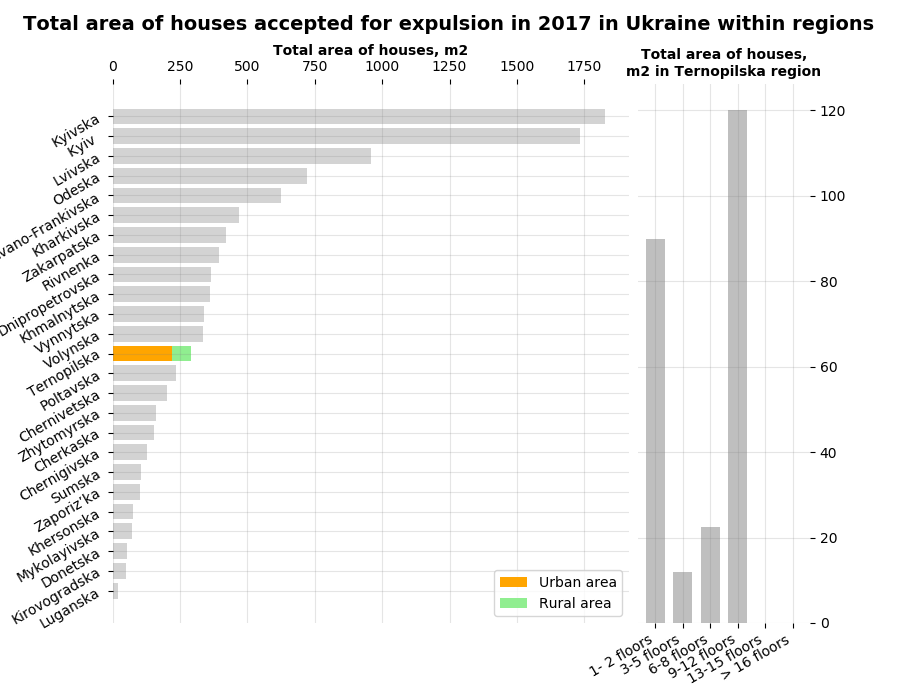

In [71]:
fig = plt.figure(figsize=(9,7)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
gs.update(wspace=0.025, hspace=0.05)
ax = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

#adding onclick event that will show distribution of completed houses within building's height

def onclick(event):
    plt.cla()
    region = df.index[int(round(event.ydata))]
    #highlighting selected data
    ax.barh(y_pos, df.urban, color = 'lightgrey')
    ax.barh(y_pos, df.rural,left=df.urban, color = 'lightgrey')
    b1 = ax.barh(round(event.ydata), df.loc[region,['urban']], color = 'orange')
    b2 = ax.barh(round(event.ydata), df.loc[region,['rural']],left=df.loc[region,['urban']], color = 'lightgreen')
    plt.text(0.65,1.1, "Total area of houses accepted for expulsion in 2017 in Ukraine within regions",
         horizontalalignment='center',
         fontsize=14,
         weight = 'bold',
         fontname = 'OpenSans',
         clip_on = False,
         transform = ax.transAxes)
    
    #adding flooring distribution for seleted area
    ax1.bar(df_floors.columns, df_floors.loc[region,:]/1000, color ='grey', alpha = 0.5, width = 0.7)
    ax1.set_xticklabels(df_floors.columns, rotation =30, horizontalalignment = 'right')
    plt.gca().set_title('Total area of houses,\nm2 in {} region'.format(region), weight = 'bold', fontsize = 10)
    ax1.grid(color = 'grey', alpha = 0.2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(color = 'grey')
y_pos = np.arange(len(df))
b1 = ax.barh(y_pos, df.urban, color = 'orange', picker = 5)
b2 = ax.barh(y_pos, df.rural,left=df.urban, color = 'lightgreen', picker =5)
ax.legend((b1[0], b2[0]), ('Urban area', 'Rural area'), loc = 'lower right')

fig.canvas.mpl_connect('button_press_event', onclick)

ax.grid(color = 'grey', alpha = 0.2)

ax.xaxis.set_ticks_position('top')
ax.set_xlabel('Total area of houses, m2', weight = 'bold')
ax.xaxis.set_label_position('top')
ax.set_yticks(y_pos)
ax.set_yticklabels(df.index, clip_on = False, rotation = 30)
plt.text(0.65,1.1, "Total area of houses accepted for expulsion in 2017 in Ukraine within regions",
         horizontalalignment='center',
         fontsize=14,
         weight = 'bold',
         fontname = 'OpenSans',
         clip_on = False,
         transform = ax.transAxes)


ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax1.bar(df_floors.columns, df_floors.loc['Ukraine',:]/1000, color ='grey', alpha = 0.5, width = 0.7)
ax1.set_xticklabels(df_floors.columns, rotation =30, horizontalalignment = 'right')
ax1.yaxis.set_ticks_position('right')
ax1.set_title('Total area of houses,\nm2',rotation = 0, weight = 'bold', fontsize  =10,
               clip_on = False)
ax1.yaxis.set_label_position('right')
ax1.grid(color = 'grey', alpha = 0.2)
